In [1]:
from urllib.request import urlopen
import requests
import json

# download, parse, analysis JSON from urls

the currency exchange data comes from <a href="https://exchangerate.host/#/">exchangerate.host</a>


<html>

  <body>
    <div class="flex">
    <div>
<a href="http://www.youtube.com/watch?feature=player_embedded&v=1lxrb_ezP-g" target="_blank"><img src="http://img.youtube.com/vi/1lxrb_ezP-g/0.jpg" alt="IMAGE ALT TEXT HERE" width="200" height="160" border="5"/></a>
</div>
        
    <div>
<a href="http://www.youtube.com/watch?feature=player_embedded&v=bkpLhQd6YQM" target="_blank"><img src="http://img.youtube.com/vi/bkpLhQd6YQM/0.jpg" alt="IMAGE ALT TEXT HERE" width="200" height="160" border="5"/></a>
    </div>
    </div>
    </body>
    </html>

# Overview

## access and use data

+ use *context manager* `with open` with `json` lib
    ```python
    with urlopen('url') as resp:
        bytes_file = resp.read()  # here resp is HTTPResponse, so read() produce *bytes*
        json_loads = json.loads(bytes_file) # here cannot use load(file), only loads(bytes/file)
        results = list()
        for ...
    ```

+ use `request` lib
    ```python
    url = f'...'
    response = request.get(url) # HTTPResponse
    dictionary = response.json() # -> dict
    ...
    ```

+ use `pandas`
    ```python
    df_json = pd.read_json(url) # DataFrame
    ```
    
## write data

+ use *context manager* `with open` and `json.dump(list, f)`
    ```python
    with open('pth/name', 'w') as f:
        json.dump(results, f)
    ```
    
+ use `json.dumps(results)` and `file.write`
    ```python
    file = open('pth/name', 'w')
    res_dumps = json.dumps(results)
    file.write(res_dumps) # write input should be str, dump output is file, dumps output is str
    file.close()
    ```

+ use `pandas`
    ```python
    # DataFrame.to_json()
    df_json.to_json('pth/name')
    ```
    
## plot data

+ use `pandas`
    ```python
    df_json.plot(x='', y='')
    ```
    or
    ```python
    df_new = pd.read_json('pth/name')
    df_new.plot()
    ```
   
   
+ use `matplotlib.pyplot`
    ```python
    plt.plot(after_process_list_1, after_process_list_2)
    ```


In [112]:
start = '2020-11-09'
end = '2021-09-05'
curr0 = 'EUR'
curr1 = 'CNY'
with urlopen(
        f'https://api.exchangerate.host/timeseries?start_date={start}&end_date={end}&base={curr0}&symbols={curr1}'
        ) as resp:
    pland_bank_json = json.loads(resp.read())
    ts_eur_cny = pland_bank_json['rates']
    result = list()
    for k, v in ts_eur_cny.items():
        rewrite_data ={
            'date': k,
            'rate': v[curr1]
        }
        result.append(rewrite_data)

with open('/home/sharma/Desktop/DeepLearning/DataScience/IO/saved_datasets/eur_cny_exchange_rates.json', 'w') as f:
    json.dump(result, f, indent=2)
type(resp),  type(resp.read())

(http.client.HTTPResponse, bytes)

In [114]:
url = f'https://api.exchangerate.host/timeseries?start_date={start}&end_date={end}&base={curr0}&symbols={curr1}'
response = requests.get(url)
exchange_rate = response.json()
result = list()
for k, v in exchange_rate['rates'].items():
    rewrite_data ={
        'date': k,
        'rate': v[curr1]
    }
    result.append(rewrite_data)

file = open('/home/sharma/Desktop/DeepLearning/DataScience/IO/saved_datasets/eur_cny_exchange_rates.json', 'w')
result_dump = json.dumps(result, indent=2)
file.write(result_dump)
file.close()
type(response), type(response.json()), type(result_dump)

(requests.models.Response, dict, str)

<AxesSubplot:xlabel='Date'>

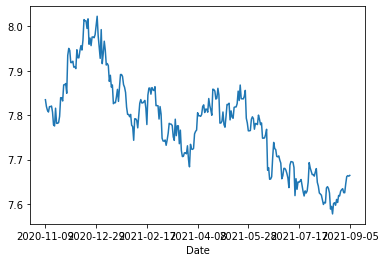

In [115]:
df_eur_cny_raw = pd.read_json(url)
df_eur_cny_raw.drop(['msg', 'url'], inplace=True)
df_eur_cny = df_eur_cny_raw['rates'].map(lambda x: x[curr1])
df_eur_cny_raw.index.name = 'Date'
df_eur_cny_raw['EUR/CNY'] = df_eur_cny
df_pandas_data = df_eur_cny_raw['EUR/CNY']
df_pandas_data.to_json('/home/sharma/Desktop/DeepLearning/DataScience/IO/saved_datasets/pandas_rates.json')
df_pandas_data.plot()

## plots

<AxesSubplot:xlabel='date'>

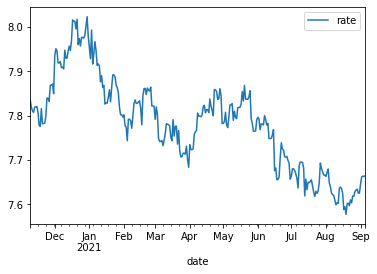

In [106]:
import pandas as pd
pd_eur_cny_json = pd.read_json(
    '/home/sharma/Desktop/DeepLearning/DataScience/IO/saved_datasets/eur_cny_exchange_rates.json')
pd_eur_cny_json.plot(x='date', y='rate')

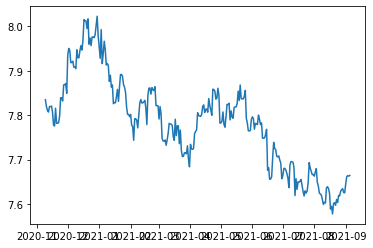

In [107]:
import matplotlib.pyplot as plt
plt.plot(pd_eur_cny_json['date'], pd_eur_cny_json['rate'])